In [24]:
!where python

E:\Anacondas\python.exe
C:\Users\ayush\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\ayush\AppData\Local\Microsoft\WindowsApps\python.exe


In [25]:
import numpy as np
import pandas as pd
df = pd.read_csv('placement.csv')
df.head(10)  #show first 10 cells only

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
5,5,7.1,48.0,1
6,6,5.7,143.0,0
7,7,5.0,63.0,0
8,8,6.1,156.0,0
9,9,5.1,66.0,0


In [26]:
df.shape  # what are the dimensions of the table

(100, 4)

In [27]:
df = df.iloc[:,1:]  ## iloc[:,1:] [row,column] show all the rows but remove the first column and then show the rest 
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


## plot the data by matplotlib

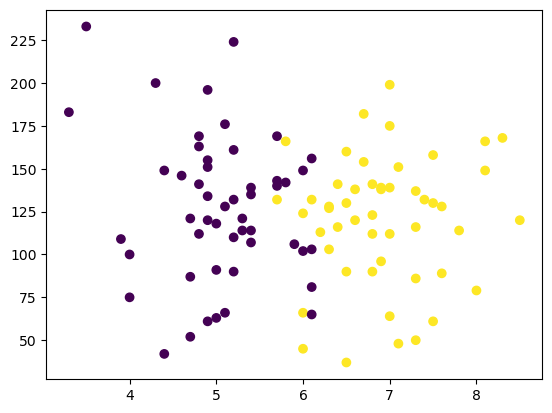

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])  ## scatter method only accept numerical values c=df['placement'] is used to color the plots

In [31]:
X = df.iloc[:,0:2] ## include all rows and 0,1 columns
Y = df.iloc[:,-1] ## include all rows and last column
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [32]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1) ## x is independent variable y is dependant variable and the 
## test_size=0.1 decides how much data we have to keep for training and the balance(0.9) will be used for training modal 

In [36]:
X_train 

,cgpa,iq
34,4.8,163.0
71,6.1,132.0
25,5.0,91.0
44,7.5,61.0
23,4.7,87.0
...,...,...
40,4.9,134.0
70,6.3,127.0
26,7.0,199.0
29,7.0,112.0


In [37]:
X_test ## random 10 rows

,cgpa,iq
47,5.2,161.0
12,5.4,139.0
54,6.4,141.0
72,7.3,116.0
56,6.1,65.0
53,8.3,168.0
83,7.5,130.0
14,6.1,103.0
73,4.9,61.0
15,5.1,176.0


In [38]:
Y_train


34    0
71    1
25    0
44    1
23    0
     ..
40    0
70    1
26    1
29    1
63    1
Name: placement, Length: 90, dtype: int64

In [39]:
Y_test ## random 10 rows for testing 

47    0
12    0
54    1
72    1
56    0
53    1
83    1
14    0
73    0
15    0
Name: placement, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) ## used to scale down the vlaues betwwen 0 and 1 
X_train

array([[-1.02152013,  0.99422897],
       [ 0.11891742,  0.21766155],
       [-0.8460682 , -0.80941149],
       [ 1.34708094, -1.56092835],
       [-1.1092461 , -0.90961374],
       [-0.49516434, -0.23324857],
       [-0.67061627, -0.83446205],
       [ 1.25935497,  0.21766155],
       [ 1.171629  , -0.9346643 ],
       [-0.93379416,  1.82089751],
       [ 0.11891742, -1.05991711],
       [ 0.03119145,  0.01725705],
       [-0.05653451, -0.43365306],
       [-0.8460682 , -0.13304632],
       [-1.72332785, -0.58395643],
       [-0.49516434, -0.4086025 ],
       [-1.02152013,  1.14453234],
       [-0.14426048,  0.46816717],
       [ 0.55754725, -0.08294519],
       [ 0.73299918,  0.44311661],
       [-1.37242399, -2.03688902],
       [-0.49516434,  0.29281323],
       [-0.23198644,  0.21766155],
       [-0.23198644,  1.14453234],
       [-0.67061627,  2.52231325],
       [ 0.11891742,  0.81887504],
       [ 0.82072514,  0.39301548],
       [ 0.03119145, -0.53385531],
       [ 1.78571076,

In [44]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.94415978,  0.9199702 ],
       [-0.76082779,  0.34170322],
       [ 0.1558322 ,  0.39427294],
       [ 0.98082618, -0.26284863],
       [-0.1191658 , -1.60337664],
       [ 1.89748616,  1.10396424],
       [ 1.16415818,  0.10513945],
       [-0.1191658 , -0.60455185],
       [-1.21915778, -1.70851609],
       [-1.03582578,  1.31424314]])

### Train the modal 

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()  ## logistic regression object creation 
clf.fit(X_train,Y_train)

In [48]:
Y_pred = clf.predict(X_test) ## test the modal with training data
## output ->  array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0])
Y_test   # compare the Y_pred with the Y_test to know the accuracy of the modal 

47    0
12    0
54    1
72    1
56    0
53    1
83    1
14    0
73    0
15    0
Name: placement, dtype: int64

### find accuracy 

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)  ## gives accuracy

0.9

 ## visulaize the decesion boundary created by the algo

In [59]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

<Axes: >

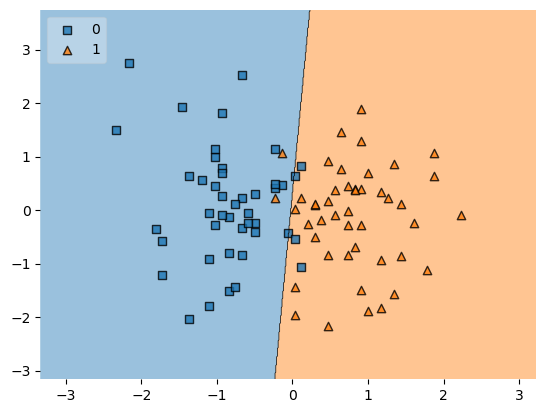

In [65]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)  ## Y_train.values is used to create it to an numpy array 

In [66]:
import pickle  ## used to export the modal
pickle.dump(clf,open('model.pkl','wb'))